In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/Propsih/test/main/data_test.csv"
data = pd.read_csv(url, sep=';')

In [3]:
data

,CLIENT_ID,VALUE_DAY,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT
0,3596869440,30.09.2021,18.0,8.0,9.0
1,181778433,30.09.2021,7.0,3.0,3.0
2,4271531990,30.09.2021,2.0,0.0,0.0
3,3949165697,30.09.2021,15.0,4.0,5.0
4,1926920317,30.09.2021,3.0,0.0,0.0
...,...,...,...,...,...
805816,4243322997,28.02.2022,2.0,0.0,0.0
805817,67461867,28.02.2022,3.0,0.0,0.0
805818,302417315,28.02.2022,NaN,NaN,NaN
805819,1780553365,28.02.2022,4.0,0.0,2.0


In [4]:
data["VALUE_DAY"] = pd.to_datetime(data["VALUE_DAY"])

/tmp/ipykernel_10984/1932585276.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data["VALUE_DAY"] = pd.to_datetime(data["VALUE_DAY"])


In [5]:
data["DIGITAL_ACTIVE"] = data["DIGITAL_30_CNT"] > 0
data["TRANSACTION_ACTIVE"] = data["TRAN_ACTIVE_30_CNT"] > 0
data["OPERATION_ACTIVE"] = data["OPER_ACTIVE_30_CNT"] > 0

In [6]:
grouped_data = data.groupby("VALUE_DAY").agg(
    total_clients=pd.NamedAgg(column="CLIENT_ID", aggfunc="nunique"),
    digital_active_clients=pd.NamedAgg(column="CLIENT_ID", aggfunc=lambda x: x[data["DIGITAL_ACTIVE"]].nunique()),
    transaction_active_clients=pd.NamedAgg(column="CLIENT_ID", aggfunc=lambda x: x[data["TRANSACTION_ACTIVE"]].nunique()),
    operation_active_clients=pd.NamedAgg(column="CLIENT_ID", aggfunc=lambda x: x[data["OPERATION_ACTIVE"]].nunique())
).reset_index()


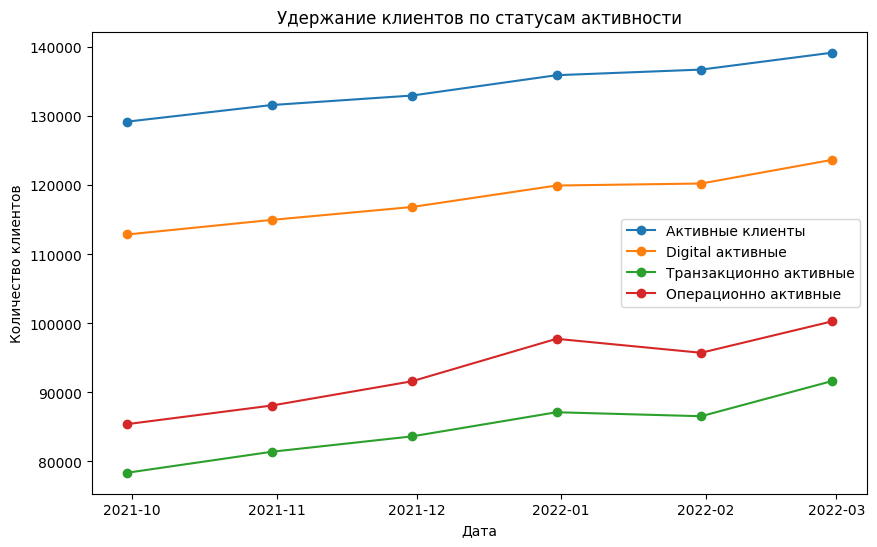

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_data["VALUE_DAY"], grouped_data["total_clients"], label="Активные клиенты", marker='o')
plt.plot(grouped_data["VALUE_DAY"], grouped_data["digital_active_clients"], label="Digital активные", marker='o')
plt.plot(grouped_data["VALUE_DAY"], grouped_data["transaction_active_clients"], label="Транзакционно активные", marker='o')
plt.plot(grouped_data["VALUE_DAY"], grouped_data["operation_active_clients"], label="Операционно активные", marker='o')

plt.title("Удержание клиентов по статусам активности")
plt.xlabel("Дата")
plt.ylabel("Количество клиентов")
plt.legend()
plt.show()